In [7]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t

import statistics
import math


In [8]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/noise/IRL_protest_result_NPCnoise_pedestrian.json', lines=True)
info_car2PPO_episode_1.columns = info_car2PPO_episode_1.columns.str.replace('noise', 'NPC noise')


In [3]:
info_car2PPO_episode_1['reward']

0       -2.960323
1       -3.361325
2       -2.958445
3       -4.103407
4       -1.737293
           ...   
29995    5.911390
29996    5.858318
29997    5.938685
29998    5.853043
29999    6.073442
Name: reward, Length: 30000, dtype: float64

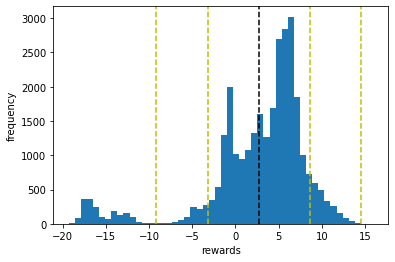

In [6]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

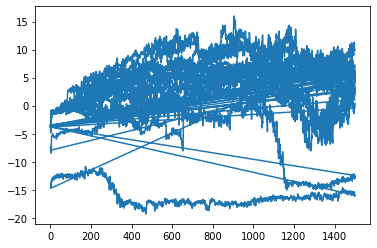

In [7]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [8]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

2.6878394698527845

In [9]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.03414900414314615

In [10]:
confLevel = 0.95

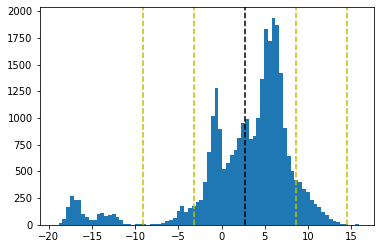

In [11]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [12]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  2.6878394698527845
Std Deviation :  5.914781020380923
1st Std Interval :  -3.2269415505281387 8.602620490233708
2nd Std Interval :  -9.141722570909062 14.517401510614631
Confidence Interval :  0.18371478722685833
Confidence Interval :  2.504124682625926 2.871554257079643


In [15]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

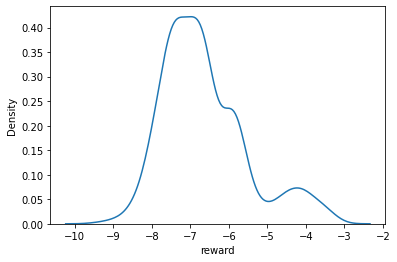

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

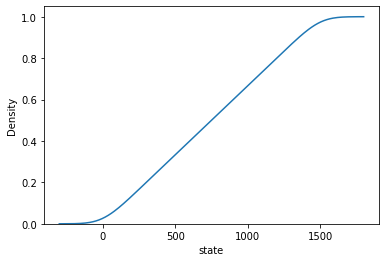

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

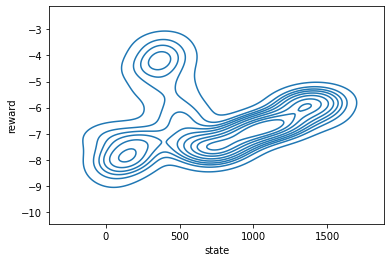

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

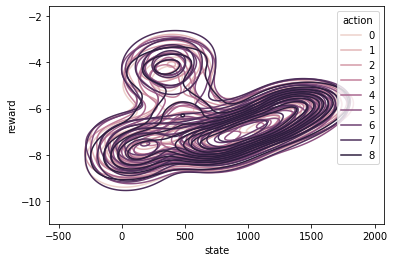

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


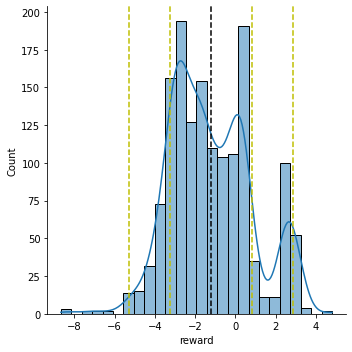

In [19]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

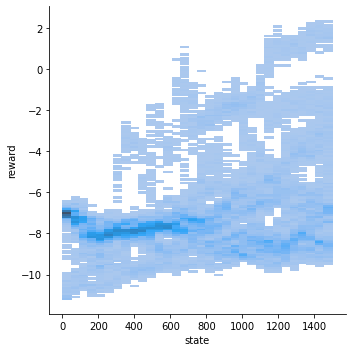

In [11]:
sns.displot(data=info_car2PPO_episode_1, x="state", y="reward")


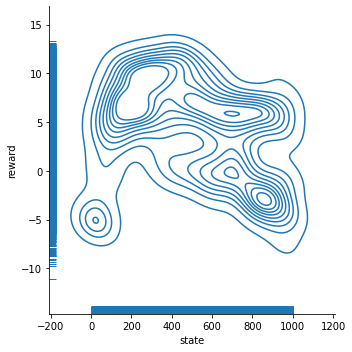

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


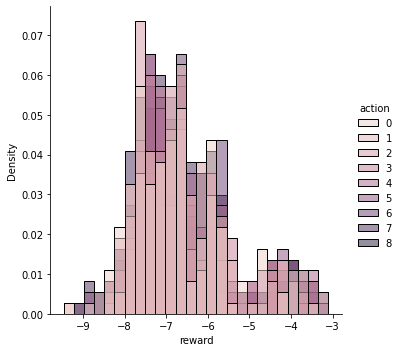

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


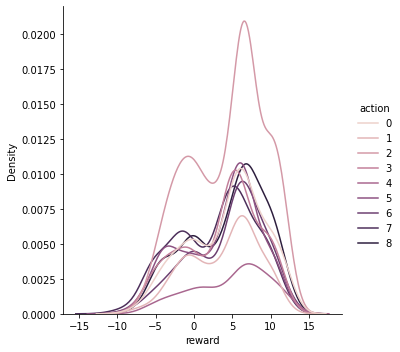

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


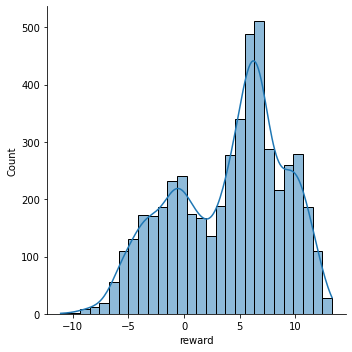

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


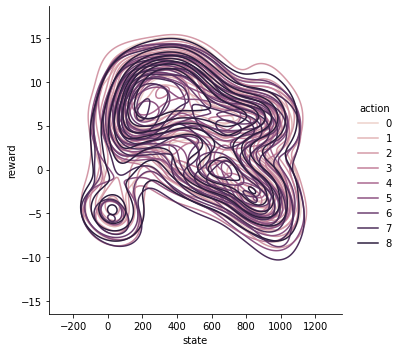

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


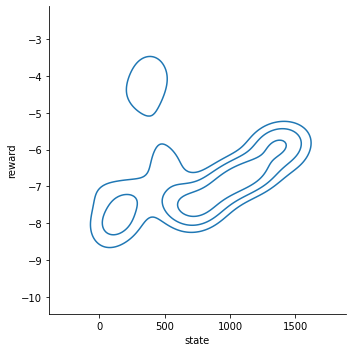

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


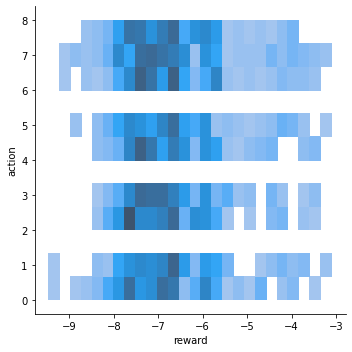

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


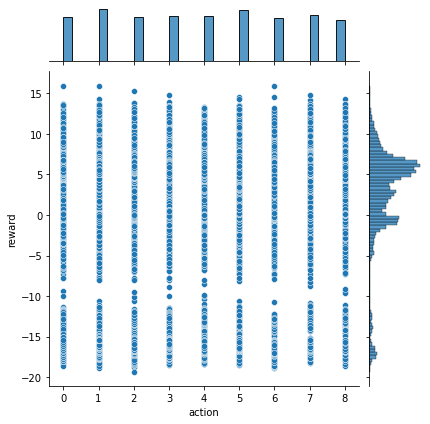

In [13]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


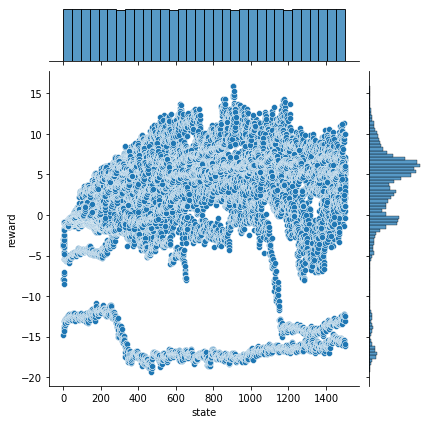

In [14]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


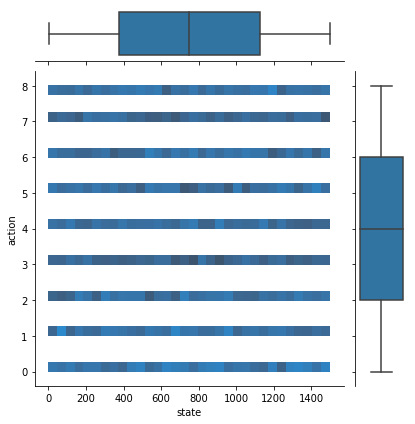

In [12]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

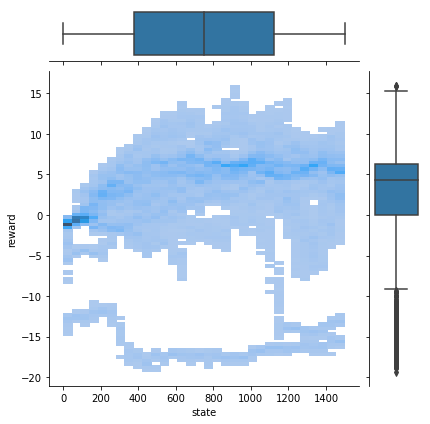

In [15]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

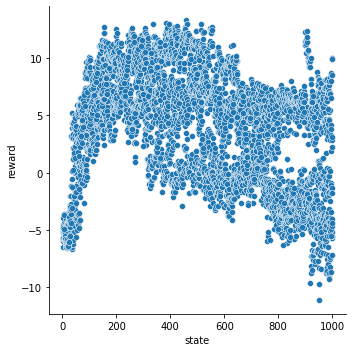

In [31]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

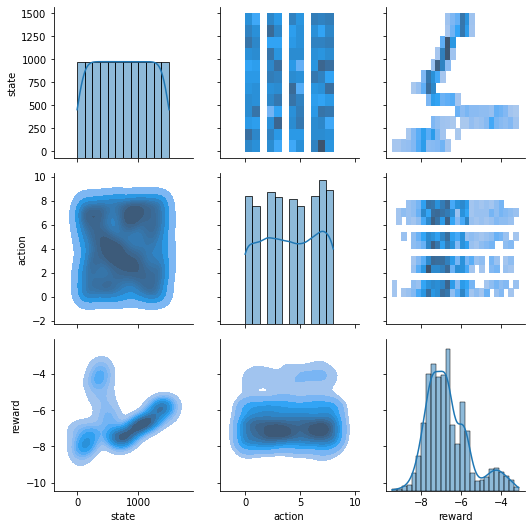

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

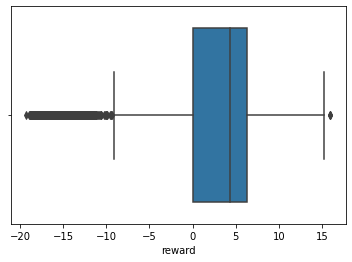

In [16]:
sns.boxplot(info_car2PPO_episode_1['reward'])


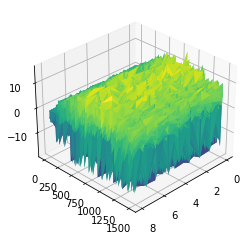

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [9]:
# Episode 1

info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/noise/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_pedestrian1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_pedestrian/noise/info_pedestrian1.json', lines=True)
info_pedestrian1 = pd.concat([info_pedestrian1.drop(['control'], axis=1), info_pedestrian1['control'].apply(pd.Series)], axis=1)


In [19]:
info_car2.shape

(30000, 35)

In [20]:
print((info_car2['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car2['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car2['collision_pedestrians']!= 0).values.sum()/30000, "collision_pedestrian")
print((info_car2['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car2['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0 collision_vehicles
0.0 collision_other
0.28836666666666666 collision_pedestrian
0.3428 intersection_offroad
0.3428 intersection_otherlane


In [4]:
SE_CO = sem(info_car2['collision_other'] != 0)
print (SE_CO)
SE_CP = sem(info_car2['collision_pedestrians'] != 0)
print (SE_CP)
SE_OS = sem(info_car2['intersection_otherlane'] != 0)
print (SE_OS)


0.0
0.0026154551728012412
0.002740411586213902


In [4]:
print (info_car2['collision_vehicles'].idxmax())
print (info_car2['collision_other'].idxmax())
print (info_car2['collision_pedestrians'].idxmax())
print (info_car2['intersection_offroad'].idxmax())

0
0
925
22854


In [5]:
print (info_car2['collision_vehicles'].idxmax()*0.134)
print (info_car2['collision_other'].idxmax()*0.134)
print (info_car2['collision_pedestrians'].idxmax()*0.134)
print (info_car2['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

0.0
0.0
123.95
3062.436


In [ ]:
mean_collision_pedestrians = []
for chunk in np.array_split(info_car2['collision_pedestrians'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_pedestrians.append((res))
    print (x, " : ", res)
mean_collision_pedestrians = statistics.mean(mean_collision_pedestrians)
mean_collision_pedestrians

In [7]:
mean_collision_pedestrians = []
for chunk in np.array_split(info_car2['collision_pedestrians'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_pedestrians.append((res))
    print (x, " : ", res)
mean_collision_pedestrians = statistics.mean(mean_collision_pedestrians)
mean_collision_pedestrians


925  :  926
2416  :  917
4242  :  1243
5606  :  1107
6000  :  1
7922  :  423
10109  :  1110
10500  :  1
13171  :  1172
14975  :  1476
16285  :  1286
17469  :  970
18634  :  635
19787  :  288
22263  :  1264
23632  :  1133
25029  :  1030
26623  :  1124
27939  :  940
29822  :  1323


918.45

In [9]:
mean_intersection_offroad= []
for chunk in np.array_split(info_car2['intersection_offroad'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_intersection_offroad.append((res))
    print (x, " : ", res)
mean_intersection_offroad = statistics.mean(mean_intersection_offroad)
mean_intersection_offroad

344  :  345
1500  :  1
3000  :  1
4692  :  193
6000  :  1
8797  :  1298
9000  :  1
10688  :  189
12443  :  444
14408  :  909
15000  :  1
16500  :  1
18000  :  1
19500  :  1
21000  :  1
22854  :  355
24000  :  1
25500  :  1
27781  :  782
28709  :  210


236.8

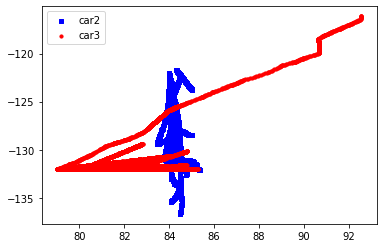

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(info_car2['x'][:15000], info_car2['y'][:15000], s=10, c='b', marker="s", label='car2')
ax1.scatter(info_pedestrian1['x'][:15000],info_pedestrian1['y'][:15000], s=10, c='r', marker="o", label='car3')
plt.legend(loc='upper left');
plt.show()

### RQ2

In [4]:
print((info_car2PPO_episode_1['noise']!= 0).values.sum()/30000,"noise")


0.0836 noise


In [5]:
info_car2PPO_episode_1['noise'].value_counts()


0    27492
1     2508
Name: noise, dtype: int64

In [6]:
print (info_car2PPO_episode_1['noise'].idxmax())


3


In [6]:
mean_noise = []
for chunk in np.array_split(info_car2PPO_episode_1['noise'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_noise.append((res))
    print (x, " : ", res)
mean_noise = statistics.mean(mean_noise)
mean_noise

3  :  4
1500  :  1
3002  :  3
4500  :  1
6412  :  413
7500  :  1
9000  :  1
10502  :  3
12000  :  1
13502  :  3
15002  :  3
16501  :  2
18413  :  414
19500  :  1
21000  :  1
22500  :  1
24000  :  1
25502  :  3
28257  :  1258
28501  :  2


105.85

### RQ3

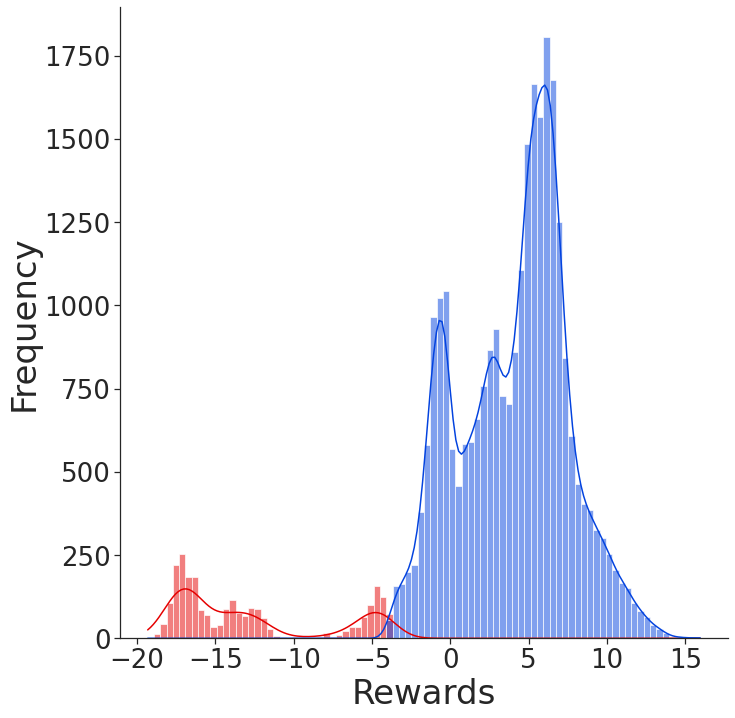

In [4]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
my_palette = sns.color_palette(["#0343DF", "#E50000"])



g = sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="NPC noise",palette=my_palette,height=10,color=color[0], legend=False)
# plt.axvline(-8, color='y', linestyle='dashed')
# g.fig.set_figwidth(8)
# g.fig.set_figheight(8)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.set_axis_labels('Rewards','Frequency',fontsize=34)

plt.savefig("RQ3_pedestrian_17.jpg",bbox_inches = "tight")


In [8]:
df = pd.DataFrame()
df['x'] = info_car2['x']
df['y'] = info_car2['y']
df['noise'] = info_car2PPO_episode_1['noise']

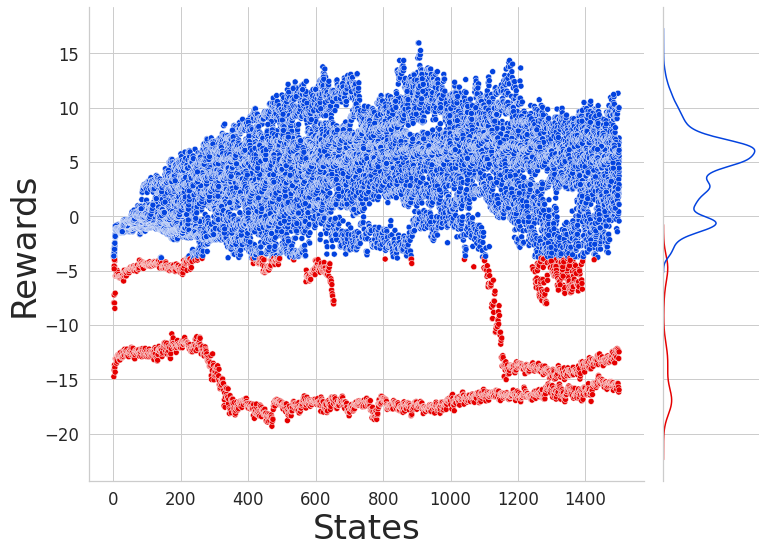

In [6]:
sns.reset_orig()
# sns.color_palette("rocket")
my_palette = sns.color_palette(["#0343DF", "#E50000"])

sns.set(font_scale = 1.5)

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward", hue="NPC noise",palette=my_palette)
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_marg_x.remove()
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.set_axis_labels('States','Rewards',fontsize=34)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.ax_joint.legend_.remove()
plt.savefig("RQ3_pedestrian_18.jpg", bbox_inches = "tight")


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


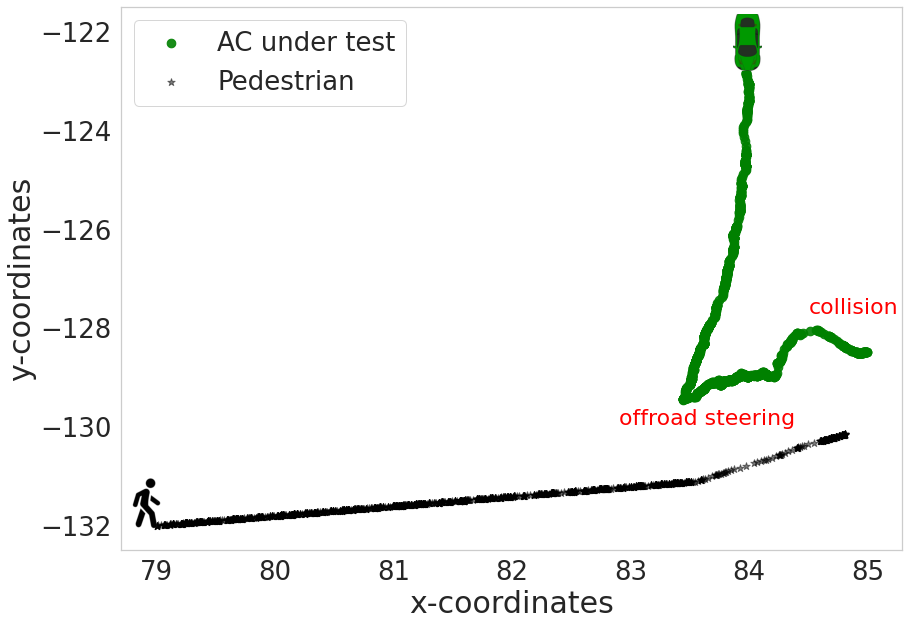

In [12]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][:1500],info_pedestrian1['y'][:1500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][:1500],info_pedestrian1['y'][:1500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(82.9, -129.95, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
plt.text(84.5, -127.7, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.732, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.15, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

plt.savefig("RQ3_pedestrian_7.jpg", bbox_inches = "tight")

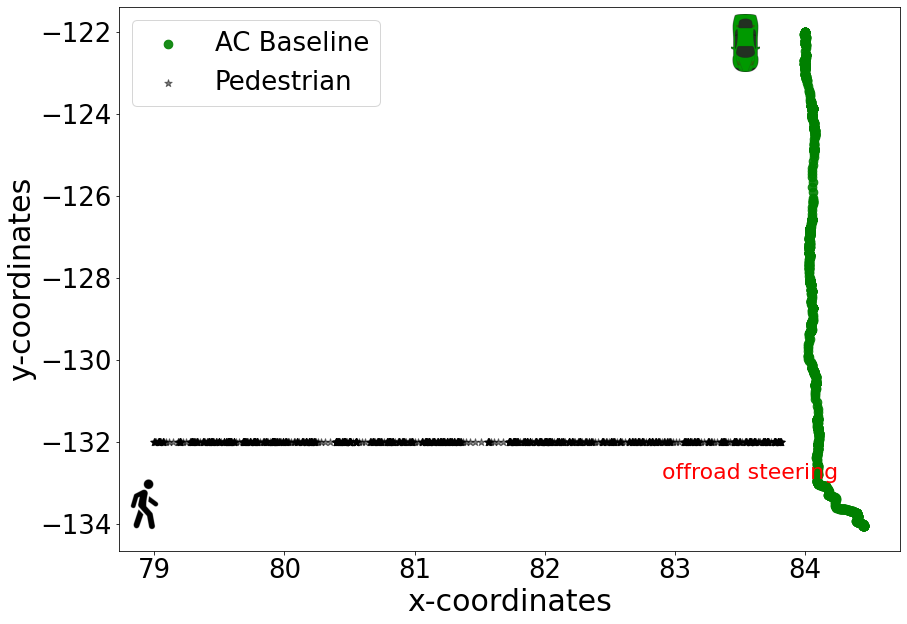

In [11]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][4501:5850], info_car2['y'][4501:5850], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][4501:5850],info_pedestrian1['y'][4501:5850], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][4501:5850], info_car2['y'][4501:5850], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][4501:5850],info_pedestrian1['y'][4501:5850], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(82.9, -132.9, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.732, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.15, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')



plt.savefig("RQ3_pedestrian_8.pdf")

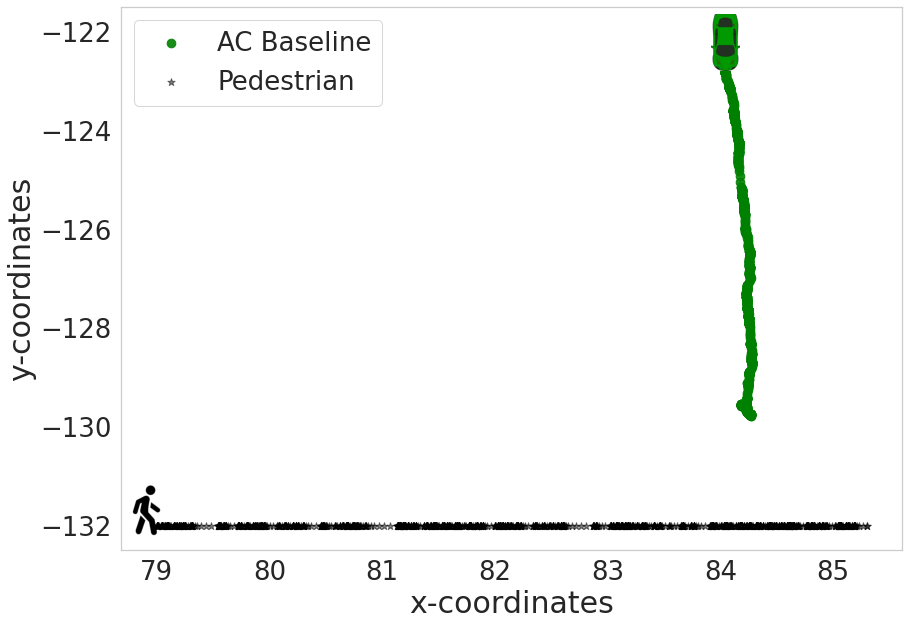

In [11]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)



plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)



im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.71, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

# plt.text(82.9, -132.9, "offroad steering", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_pedestrian_9.jpg", bbox_inches = "tight")

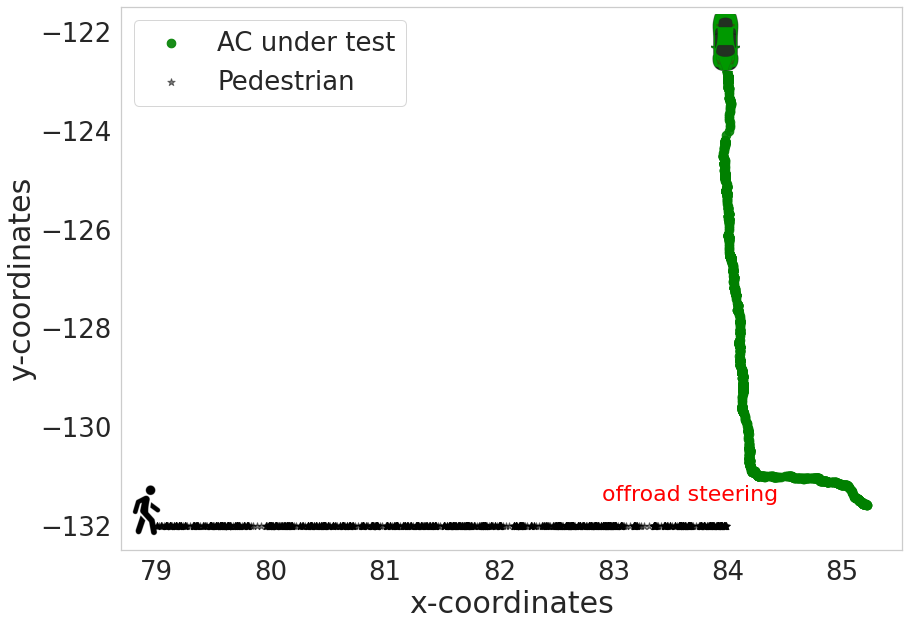

In [13]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][12001:13500],info_pedestrian1['y'][12001:13500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][12001:13500],info_pedestrian1['y'][12001:13500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)
plt.text(82.9, -131.5, "offroad steering", horizontalalignment='left', size='22', color='red', fontname='Comic Sans MS')



im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.71, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

plt.savefig("RQ3_pedestrian_10.jpg", bbox_inches = "tight")

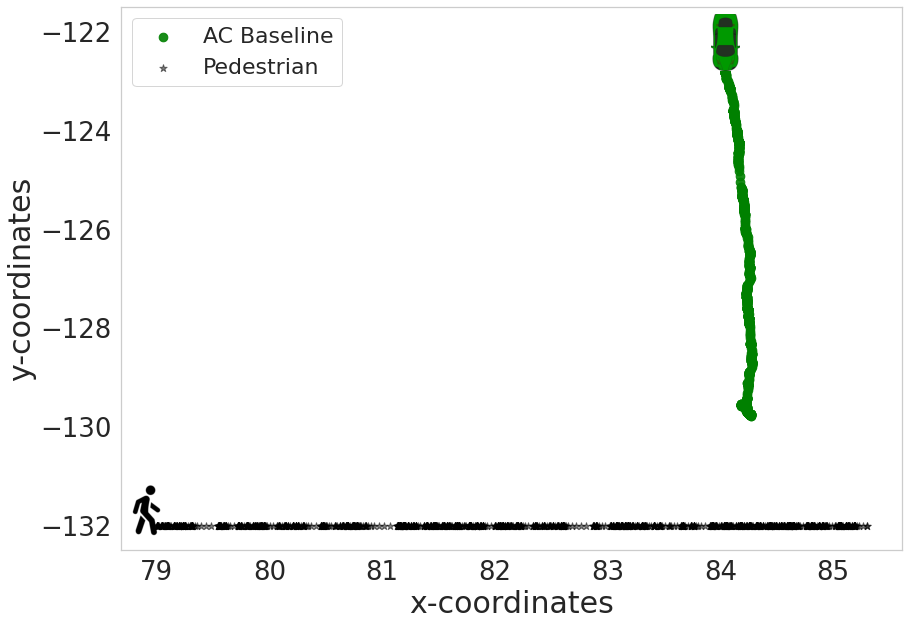

In [10]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][9001:10500],info_pedestrian1['y'][9001:10500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=22)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)



im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.71, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

# plt.text(82.9, -132.9, "offroad steering", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_pedestrian_11.jpg", bbox_inches = "tight")

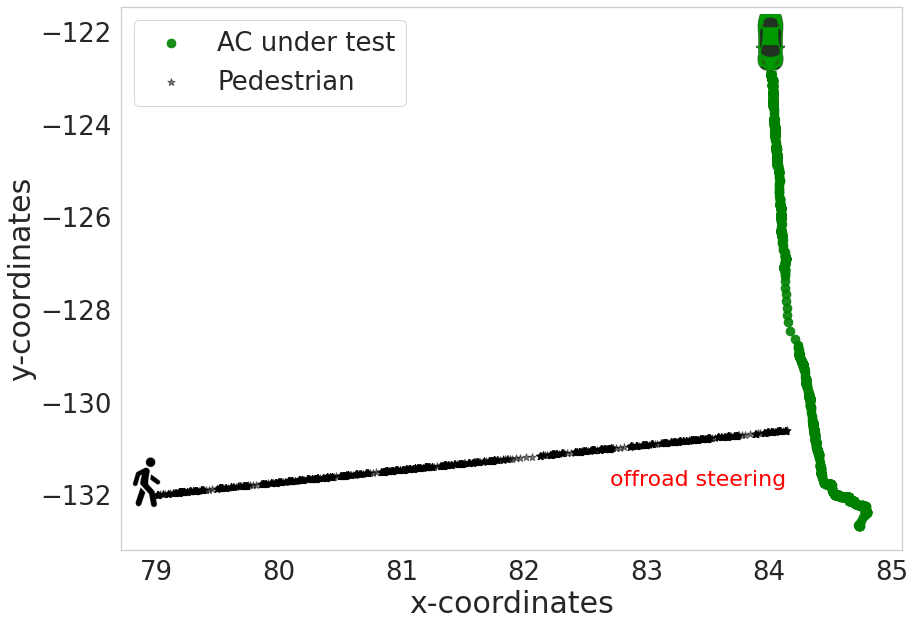

In [14]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian1['x'][3001:4500],info_pedestrian1['y'][3001:4500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][3001:4500],info_pedestrian1['y'][3001:4500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)
plt.text(82.7, -131.8, "offroad steering", horizontalalignment='left', size='22', color='red', fontname='Comic Sans MS')



im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.755, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.18, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

plt.savefig("RQ3_pedestrian_12.jpg", bbox_inches = "tight")

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


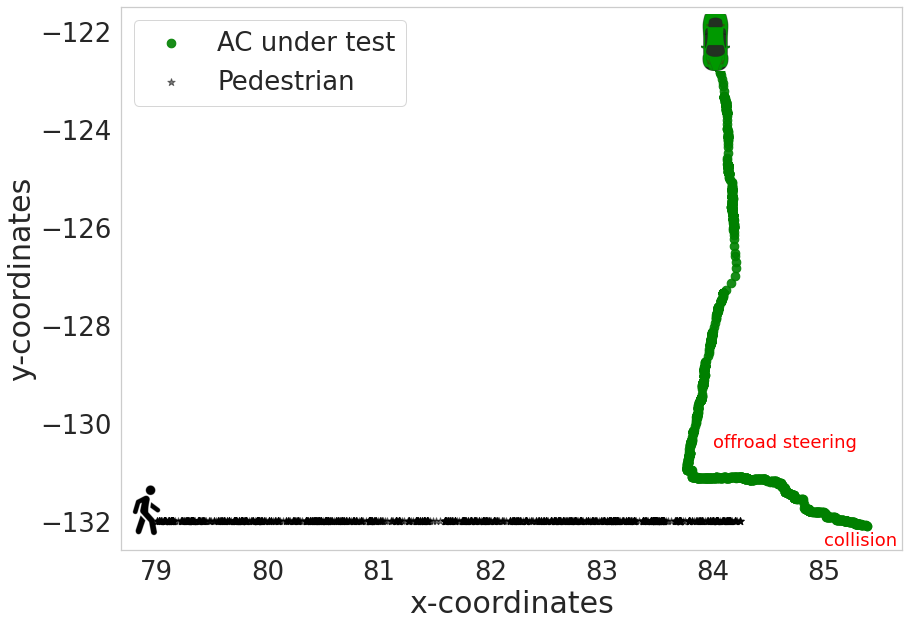

In [15]:
# fig = plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)



# ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=300, c='green', marker=".", label='car2',alpha =0.08,)
# ax1.scatter(info_pedestrian1['x'][1501:3000],info_pedestrian1['y'][1501:3000], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)
# plt.legend(loc='upper right')
# plt.xlabel('x-coordinates', fontsize=22)
# plt.ylabel('y-coordinates', fontsize=22)

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian1['x'][1501:3000],info_pedestrian1['y'][1501:3000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)
plt.text(84.0, -130.5,  "offroad steering", horizontalalignment='left', size='18', color='red', fontname='Comic Sans MS')
plt.text(85.0, -132.5,  "collision", horizontalalignment='left', size='18', color='red', fontname='Comic Sans MS')



im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.70, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.14, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

plt.savefig("RQ3_pedestrian_13.jpg", bbox_inches = "tight")

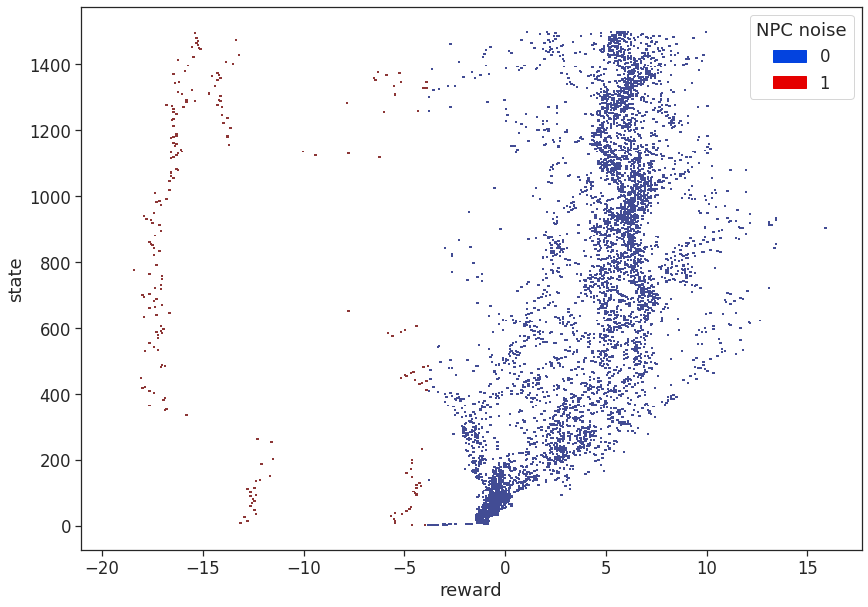

In [25]:
sns.reset_orig()
sns.set(font_scale = 1.5)

fig = plt.figure(figsize=(14,10))
my_palette = sns.color_palette(["#0343DF", "#E50000"])
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="NPC noise", palette=my_palette,
    bins=500,
    pthresh=.4, pmax=.05, 
)
plt.savefig("RQ3_pedestrian_19.pdf")


In [140]:
!pip install plotly==5.3.1

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 23.9MB 95kB/s s eta 0:00:01
  Found existing installation: plotly 5.14.1
    Uninstalling plotly-5.14.1:
      Successfully uninstalled plotly-5.14.1
You are using pip version 21.3.1, however version 23.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [144]:
! pip install kaleido==0.1.0post1

  Could not find a version that satisfies the requirement kaleido==0.1.0post1 (from versions: 0.0.3, 0.0.3.post1, 0.1.0a2, 0.1.0a3, 0.1.0, 0.2.0rc1, 0.2.0, 0.2.1)
No matching distribution found for kaleido==0.1.0post1
You are using pip version 21.3.1, however version 23.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [146]:
import plotly.graph_objects as go
import kaleido #required

animals=['AST-BA',]
animals2=['ReMAV',]

fig = go.Figure(data=[
    go.Bar(x=animals, y=[10],width=[0.2],marker_color='lightslategrey',),
    go.Bar(x=animals2, y=[8],width=[0.2],marker_color='crimson',)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    autosize=False,
    width=600,
    height=650,)

fig.update_layout(
    yaxis_title="Training Time (Hours)"
)
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))

fig.update_layout(
xaxis = dict(
tickfont = dict(size=26)))
fig.update_yaxes(title_font=dict(size=26))
fig.update_xaxes(title_font=dict(size=26))

fig.update_layout(showlegend=False)
fig.update_layout(bargap=0.2)

fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
})
fig.update_xaxes(linewidth = 2, linecolor ='black')
fig.update_yaxes(linewidth = 2, linecolor ='black')
fig.show()
# fig.write_image("your_image.pdf")


In [119]:
import plotly.graph_objects as go
animals=['AST-BA',]
animals2=['ReMAV',]

fig = go.Figure(data=[
    go.Bar(x=animals, y=[4060],width=[0.2],marker_color='lightslategrey',),
    go.Bar(x=animals2, y=[925],width=[0.2],marker_color='crimson')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    autosize=False,
    width=600,
    height=650,)

fig.update_layout(
    yaxis_title="Time to detect first failure (steps)"
)
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))

fig.update_layout(
xaxis = dict(
tickfont = dict(size=26)))
fig.update_yaxes(title_font=dict(size=26))
fig.update_xaxes(title_font=dict(size=26))

fig.update_layout(showlegend=False)
fig.update_layout(bargap=0.2)

fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
})
fig.update_xaxes(linewidth = 2, linecolor ='black')
fig.update_yaxes(linewidth = 2, linecolor ='black')
fig.show()